c:\Anaconda\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


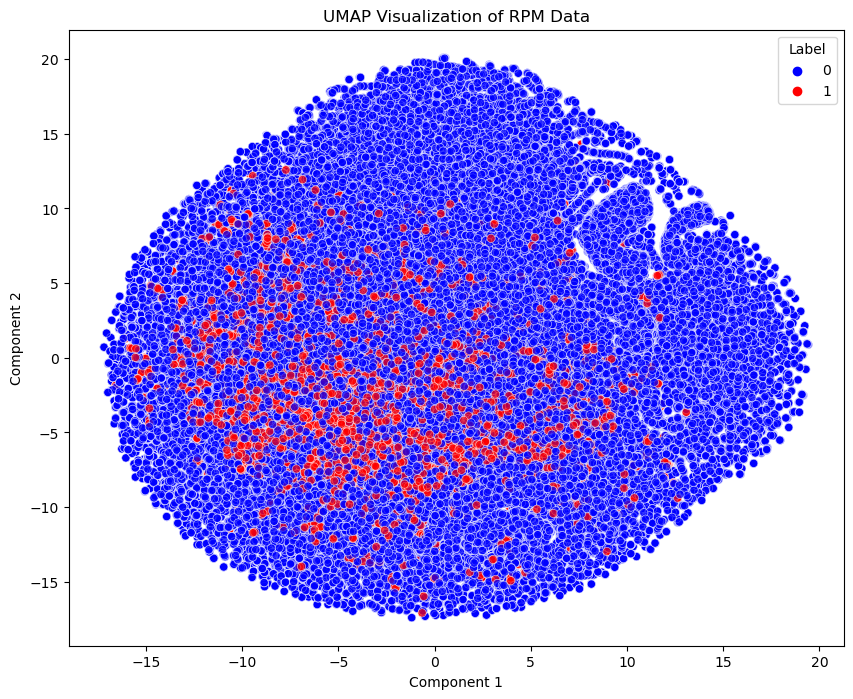

In [5]:
import pandas as pd
import numpy as np
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def plot_umap(X, y, title='UMAP Plot', n_neighbors=15, min_dist=0.1, n_components=2, n_jobs=-1):
    """
    This function performs UMAP on the dataset and plots the results.
    Args:
    - X: Feature matrix (numpy array).
    - y: Labels (numpy array).
    - title: Title for the plot.
    - n_neighbors: The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
    - min_dist: The effective minimum distance between embedded points.
    - n_components: Number of dimensions UMAP should reduce to (usually 2 or 3).
    - n_jobs: The number of parallel jobs to run for neighbors search.
    """
    # Initialize UMAP
    umap_model = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42, n_jobs=n_jobs)
    
    # Fit and transform the data
    X_umap = umap_model.fit_transform(X)

    # Create a DataFrame for easier plotting
    umap_df = pd.DataFrame({
        'Component 1': X_umap[:, 0],
        'Component 2': X_umap[:, 1],
        'Label': y
    })
    palette = {0: 'blue', 1: 'red'}  # Update or extend this dictionary for more labels and colors
    
    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='Component 1', y='Component 2', hue='Label',
        palette=palette,
        data=umap_df, legend="full", alpha=0.7
    )
    plt.title(title)
    plt.show()

def hex_to_int(x):
    if isinstance(x, str):
        try:
            return int(x, 16)
        except ValueError:
            return np.nan
    else:
        return x

# Load your dataset
datasetType = "normal"  # Specify the dataset type
data = pd.read_csv(f'Dataset/CleanDataset/Cleaned_{datasetType}_dataset.csv')

data.columns = ['Timestamp', 'CAN_ID', 'DLC', 'DATA0', 'DATA1',
                'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']

# Convert CAN_ID and DATA columns from hex to int
data['CAN_ID'] = data['CAN_ID'].apply(hex_to_int)
for i in range(8):
    data[f'DATA{i}'] = data[f'DATA{i}'].apply(hex_to_int)

# Handle any remaining non-numeric values by replacing them with 0 or any other appropriate value
data = data.fillna(0)

# Label encoding 'Flag' and creating 'Label' column
data['Label'] = data['Flag'].apply(lambda x: 0 if x == 'R' else 1)

# Use only a subset of the data
subset_data = data.sample(frac=0.1, random_state=42)  # Using 10% of the data as a subset

# Prepare data for UMAP
X = subset_data.drop(['Flag', 'Label'], axis=1).values  # Drop both 'Flag' and 'Label' columns
y = subset_data['Label'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the number of features in the dataset
num_features = X_scaled.shape[1]

# Apply PCA to reduce dimensions before UMAP
# Set n_components to a value less than the number of features
pca = PCA(n_components=min(10, num_features), random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot UMAP with simplified parameters
plot_umap(X_pca, y, title=f'UMAP Visualization of {datasetType} Data', n_neighbors=10, min_dist=0.3, n_jobs=-1)
 